In [2]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus


In [3]:
# data = load_breast_cancer()
# dataset = pd.DataFrame(data=data['data'], columns=data['feature_names'])
# dataset

col_names = ['Season', 'Age(18-36)', 'Childish disease', 'Accident', 'Surgical', 'Fevers in last year', 'Alcohol', 'Smoking', 'Hours sitting(0-16)', 'Diagnosis']

datasets = pd.read_csv('fertility_Diagnosis.csv', header=None, names=col_names)
datasets
# clf = DecisionTreeClassifier(random_state=0)
# iris = load_iris()
# cross_val_score(clf, iris.data, iris.target, cv=10)

,Season,Age(18-36),Childish disease,Accident,Surgical,Fevers in last year,Alcohol,Smoking,Hours sitting(0-16),Diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,1
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,0
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,1
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,1
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,0
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,1
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,1
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,1
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,1


Accuracy: 0.8333333333333334
0.50 accuracy with a standard deviation of 0.11


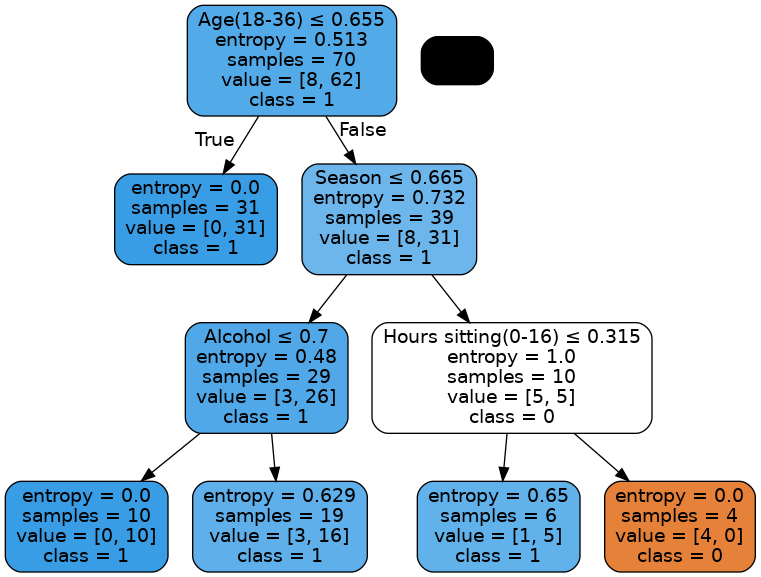

In [25]:
feature_names = ['Season', 'Age(18-36)', 'Childish disease', 'Accident', 'Surgical', 'Fevers in last year', 'Alcohol', 'Smoking', 'Hours sitting(0-16)']

X = datasets[feature_names]
y = datasets.Diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(clf,X, y, cv=5, scoring='f1_macro')
print("{:0.2f} accuracy with a standard deviation of {:0.2f}".format(scores.mean(), scores.std()))

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature_names, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph1.png')

Image(graph.create_png())